# **Packages Import**

In [ ]:
import pandas as pd                                            #Library to readf/write IO files: csv,excel,txt
import re                                                      #Regular Expression for data cleaning
import nltk                                                    #Natural Language ToolKit for NLP cleaning
from sklearn.model_selection import train_test_split           #Sickit Learn library [model_selection] for data partition Train & Test
from sklearn.neural_network  import MLPClassifier               #Sickit Learn library of neural network for classification
from sklearn.naive_bayes     import GaussianNB                 #Sickit Learn library of Bayes Theory for classification
from sklearn.svm             import SVC                        #Sickit Learn library of SVM for classification

# **Step 1- Data Understanding**

This step aims to understand:
*   ***Size of data***: Number of samples
*   ***Variables*** of dataset and select the suitable coloumns to work with
*   ***Number of classes***: Sentiment can be positive or negative (Binary Classification) Vs Multiclass  positive or negative or neutral



In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

After loading dataset, we notice that the necessary variables are:
*   Classes: ***airline sentiment*** column
*   Textual Information: represented at the column ***text***

We have to analyze also the ariline column to check if we collected data from one compagny or our dataset covers more than one compagny. [***airline***]

The dataset contains ***14640*** non-null samples.



In [ ]:
df.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In our case, we will design a multicall sentiment analyzer into three targets: ['neutral', 'positive', 'negative']

# **Step 2- Data Analysis**

The goal of this step is to check:
*   No imbalanced database: N1(nbr of samples of POstive Class ~ nbr of samples of Negative Class ~ nbr of samples of   Neutral Class
*   Generic data: do not conern only one compagny



In [ ]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

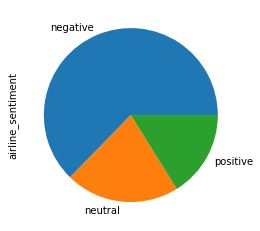

In [ ]:
df.airline_sentiment.value_counts().plot(kind='pie')

In [ ]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

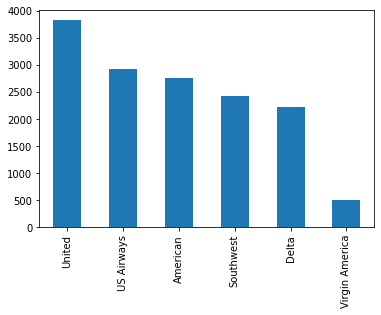

In [ ]:
df.airline.value_counts().plot(kind='bar')

# **Step 3 - Data Cleaning**

The goal of this step is to apply a pipeline of cleaning based on NLTK and Regular expression libraires

In [ ]:
features=df.iloc[:,10]
labels=df.iloc[:,1]

In [ ]:
features

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [ ]:
labels

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(len(stopwords.words('english')))

179


In [ ]:
tidy_features = [] # La nouvelle matrrice qui contient le texte prétraitée
for i in range(0, len(features)):
  # Remove all the special characters
  tidy_feature = re.sub(r'[^a-zA-Z0-9]', ' ', str(features[i]))
  # remove all single characters: espace + Charcater + Espace Bonjour a my
  tidy_feature= re.sub(r'\s+[a-zA-Z]+\s', ' ', tidy_feature)
  # remove all single digit: espace + Charcater + Espace Bonjour a my
  tidy_feature= re.sub(r'\s+[0-9]+\s', ' ', tidy_feature)
  # Substituting multiple spaces with single space
  tidy_feature = re.sub(r'\s+', ' ', tidy_feature, flags=re.I)
  # Subtituting a prefexied @ with ''
  tidy_feature = re.sub(r'^@+', '', tidy_feature)
  tidy_feature = re.sub(r'http', '', tidy_feature)
  tidy_feature = tidy_feature.lower()
  tidy_features.append(tidy_feature)
print ("****** Tidy Features ********")
print(tidy_features)

****** Tidy Features ********
[' what said ', ' plus ve commercials the ', ' i t mean need take trip ', ' it really to obnoxious your have recourse', ' and s really bad about it', ' seriously pay flight seats didn have playing s the bad about va', ' yes every i vx worm t away ', ' really a opportunity men hats co mwpg7grezp', ' well didn but i d', ' it amazing arrived hour re good me ', ' did know suicide the leading of among 24', ' i graphics much than iconography d', ' this such great thinking my 2nd to haven even on 1st yet p', ' i flying skies take the away travel co ahlxhhkiyn', ' thanks ', ' sfo schedule still ', ' so for first country lax mco ve nothing great about america 29daystogo', ' flew nyc sfo week couldn fully in seat to large on side me ', 'i ', ' you what be awesome fll want fly only ', ' why your fares may three more other when seats available select ', ' i this co ut5grrwaaa', ' i the innovation are feel brand ', ' will be bos las stop anytime ', ' you messed my rese

# **Step 4- Word Embedding using TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=1500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
numerical_tidy_features = vectorizer.fit_transform(tidy_features).toarray()
print(numerical_tidy_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# **Step 5- Machine Learning**

To start Machine learning, we have to split data into at least two partitions:
*   Training set: X_train and y_train
*   Val/Test set: X_test and y_test
How to partionate data?
X = features set
y=labels
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(numerical_tidy_features,labels,test_size=0.2)

* Size of train: 16640 * 0.8
* Size of test:  16640 * 0.2

In [ ]:
print("Size of training set = ",len(y_train))
print("Size of testing set = ",len(y_test))

Size of training set =  11712
Size of testing set =  2928


In [ ]:
gnb=GaussianNB()
neural=MLPClassifier(hidden_layer_sizes=(10,10),activation="logistic",solver='adam')


In [ ]:
linear=SVC(kernel='linear')
rbf=SVC(kernel='rbf')
sigmoid=SVC(kernel='sigmoid')
poly=SVC(kernel='poly',degree=2)

In [ ]:
gnb.fit(X_train,y_train)
neural.fit(X_train,y_train)
linear.fit(X_train,y_train)
rbf.fit(X_train,y_train)
sigmoid.fit(X_train,y_train)
poly.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVC(degree=2, kernel='poly')

In [ ]:
y_gnb=gnb.predict(X_test)
y_neural=neural.predict(X_test)
y_linear=linear.predict(X_test)
y_rbf=rbf.predict(X_test)
y_sigmoid=sigmoid.predict(X_test)
y_poly=poly.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("****  Naive Bayes   ****")
print(classification_report(y_test,y_gnb))
print("**** Neural Network ****")
print(classification_report(y_test,y_neural))
print("****   Linear SVM  ****")
print(classification_report(y_test,y_linear))
print("****   RBF SVM  ****")
print(classification_report(y_test,y_rbf))
print("****   Sigmoid SVM  ****")
print(classification_report(y_test,y_sigmoid))
print("****   Poly SVM  ****")
print(classification_report(y_test,y_poly))

****  Naive Bayes   ****
              precision    recall  f1-score   support

    negative       0.87      0.23      0.36      1826
     neutral       0.24      0.26      0.25       645
    positive       0.21      0.78      0.33       457

    accuracy                           0.32      2928
   macro avg       0.44      0.42      0.31      2928
weighted avg       0.63      0.32      0.33      2928

**** Neural Network ****
              precision    recall  f1-score   support

    negative       0.78      0.80      0.79      1826
     neutral       0.47      0.45      0.46       645
    positive       0.52      0.50      0.51       457

    accuracy                           0.67      2928
   macro avg       0.59      0.58      0.59      2928
weighted avg       0.67      0.67      0.67      2928

****   Linear SVM  ****
              precision    recall  f1-score   support

    negative       0.73      0.93      0.82      1826
     neutral       0.58      0.27      0.37       645
 

In [ ]:
import pickle
pickle.dump(rbf,open("best.pkl","wb"))